In [14]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

#import data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read the data files and save into variables
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#read the data files and pring the df
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
#check for number of mice
unique_mice_count = len(merge_df["Mouse ID"].unique())
print(f"Unique mice in study: {unique_mice_count} ")

Unique mice in study: 249 


In [16]:
#get duplicate mice by Mouse ID and Timepoint
duplicateMice_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicateMice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
#Get all the data for the duplicate mouse ID
merge_df.loc[merge_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
de_dup_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]
de_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
updated_mice_count = len(de_dup_df["Mouse ID"].unique())
print(f"Unique mice in study remaining: {updated_mice_count} ")

Unique mice in study remaining: 248 


In [30]:
#Summary statistics of tumor volume
drug_regimen_groupby = de_dup_df.groupby(["Drug Regimen"])
reg_mean = drug_regimen_groupby["Tumor Volume (mm3)"].mean()
reg_med = drug_regimen_groupby["Tumor Volume (mm3)"].median()
reg_var = drug_regimen_groupby["Tumor Volume (mm3)"].var()
reg_std = drug_regimen_groupby["Tumor Volume (mm3)"].std()
reg_sem = drug_regimen_groupby["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean": reg_mean.map("{:.2f}".format),
                                 "Median": reg_med.map("{:.2f}".format),
                                 "Variance": reg_var.map("{:.2f}".format),
                                 "Standard Deviation": reg_std.map("{:.2f}".format),
                                 "SEM": reg_sem.map("{:.2f}".format)})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [32]:
#aggregation method for stats
clean_agg_df = drug_regimen_groupby.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
clean_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

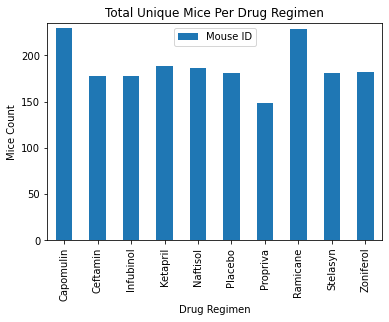

In [48]:
#Generate a bar plot showing the total number of unique mice tested on each drug regimint
drug_regimen_df = de_dup_df[["Drug Regimen", "Mouse ID"]]
drug_regimen_names = drug_regimen_df.groupby(["Drug Regimen"]).count()
drug_regimen_names.plot(kind="bar")
plt.ylim((0, 235))
plt.title("Total Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.savefig("Analysis/TotalUniqueMiceBar.png", bbox_inches='tight')
plt.show()

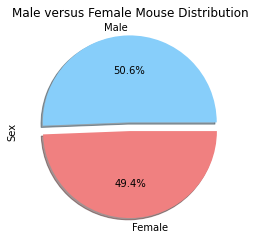

In [73]:
#generate a pie plot showing the distribution of female to male mice using pyplot
gender_count = merge_df["Sex"].value_counts()
colors = ["lightskyblue", "lightcoral"]
explode = [0.1, 0]
gender_count.plot(kind="pie", autopct="%1.1f%%", explode=explode, colors=colors, shadow=True)
plt.title("Male versus Female Mouse Distribution")
plt.savefig("Analysis/MalevFemaleDist.png")
plt.show()

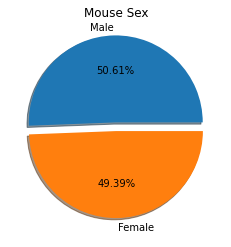

In [74]:
#generate a pie plot showing the distribution of female to male mice using pandas
plt.pie(gender_count, shadow=True, autopct="%1.2f%%", explode=explode, labels=('Male', 'Female'))
plt.title("Mouse Sex")
plt.savefig("Analysis/MalevFemaleDist_pandas.png")

In [ ]:
#generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin